In [20]:
import pandas as pd
import json
import urllib.request
import math
import sys
import requests
from pprint import pprint
import json 

# Data viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
url = "https://api.llama.fi/protocols"

In [4]:
# function to use requests.post to make an API call to the subgraph url
def run_GET(url):

    # endpoint where you are making the request
    request = requests.get(url)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.'.format(request.status_code))

In [5]:
result = run_GET(url)

In [6]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
result

[{'id': '2269',
  'name': 'Binance CEX',
  'address': None,
  'symbol': '-',
  'url': 'https://www.binance.com',
  'description': 'Binance is a cryptocurrency exchange which is the largest exchange in the world in terms of daily trading volume of cryptocurrencies',
  'chain': 'Multi-Chain',
  'logo': 'https://icons.llama.fi/binance-cex.jpg',
  'audits': '0',
  'audit_note': None,
  'gecko_id': None,
  'cmcId': None,
  'category': 'CEX',
  'chains': ['Ethereum', 'Binance', 'Tron', 'Bitcoin'],
  'module': 'binance/index.js',
  'twitter': 'binance',
  'forkedFrom': [],
  'oracles': [],
  'listedAt': 1668170565,
  'slug': 'binance-cex',
  'tvl': 78687012638.6106,
  'chainTvls': {'Binance': 21310745004.43964,
   'Ethereum': 26041250664.26054,
   'Tron': 16211797675.472792,
   'Bitcoin': 15123219294.437614},
  'change_1h': 0.2723840955951573,
  'change_1d': 0.08161287226693048,
  'change_7d': 1.3533886847502998,
  'tokenBreakdowns': {}},
 {'id': '182',
  'name': 'Lido',
  'address': '0x5a98f

In [29]:
selected_keys = ['slug', 'name', 'chain','tvl', 'symbol', 'url', 'description']
# tmp = [{key: p[key]} for key in selected_keys for p in result]
tmp = [dict((k, p[k]) for k in selected_keys) for p in result]
df_p = pd.DataFrame(tmp).sort_values(by=['tvl'], ascending=False).iloc[:20]

In [30]:
df_p.head(50)

,slug,name,chain,tvl,symbol,url,description
0,binance-cex,Binance CEX,Multi-Chain,7.633398e+10,-,https://www.binance.com,Binance is a cryptocurrency exchange which is ...
1,lido,Lido,Multi-Chain,9.925772e+09,LDO,https://lido.fi/,"Liquidity for staked assets. Daily rewards, no..."
2,okx,OKX,Multi-Chain,8.572120e+09,-,https://www.okx.com,"OKX, formerly known as OKEx, is a Seychelles-b..."
3,polygon-bridge-&-staking,Polygon Bridge & Staking,Polygon,8.362129e+09,MATIC,https://polygon.technology/,Ethereum sidechain\r\n
4,bitfinex,Bitfinex,Multi-Chain,8.304004e+09,-,https://www.bitfinex.com,Bitfinex facilitates a graphical trading exper...
5,makerdao,MakerDAO,Ethereum,8.064118e+09,MKR,https://makerdao.com/,"Builders of Dai, a digital currency that can b..."
6,curve,Curve,Multi-Chain,4.199555e+09,CRV,https://curve.fi,Curve is a decentralized exchange liquidity po...
7,aave-v2,AAVE V2,Multi-Chain,4.181416e+09,AAVE,https://aave.com\r\n,Aave is an Open Source and Non-Custodial proto...
8,crypto-com,Crypto-com,Multi-Chain,3.867520e+09,-,https://crypto.com,The World Fastest Growing Crypto App.
9,wbtc,WBTC,Ethereum,3.778604e+09,WBTC,https://wbtc.network/,Wrapped Bitcoin (WBTC) is the first ERC20 toke...


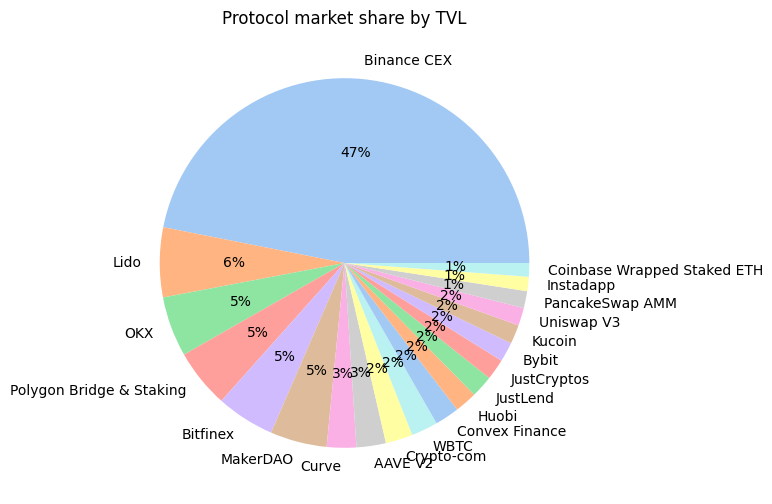

In [26]:
# Mostly cexes, so now is mainly a trading vehicle
fig,ax = plt.subplots(figsize=(12,6))
plt.title("Protocol market share by TVL")
plt.pie(df_p['tvl'], labels=df_p['name'], colors = sns.color_palette('pastel'), autopct="%.00f%%")
plt.show()

In [8]:
# Let's do a rough compare of uniswap v2 and v3 

def historical_tvl(slug):
    url = f"https://api.llama.fi/protocol/{slug}"
    print(f"url: {url}")
    result = run_GET(url)
#     print(result)
    selected_keys = ['id', 'name', 'symbol','chains', 'chainTvls', 'url', 'description']
    chain_dfs = {}
    tmp = dict((k, result[k]) for k in selected_keys)
    for c in tmp['chains']:
        print(f"chain: {c}")
#         print(tmp["chainTvls"][c])
        print(tmp["chainTvls"][c].keys())
        for k in tmp["chainTvls"][c].keys():
            stat = tmp["chainTvls"][c][k]
            if len(stat) == 0: continue
            df_c = pd.DataFrame(stat)
            df_c['date'] = pd.to_datetime(df_c['date'])
            df_c.set_index('date', inplace=True)
            chain_dfs[f"{c}_{k}"] = (df_c)
#     df_p = pd.DataFrame(tmp).sort_values(by=['tvl'], ascending=False).iloc[:20]
    return chain_dfs

In [9]:
uniswap_v3 = historical_tvl('uniswap-v3')

url: https://api.llama.fi/protocol/uniswap-v3
chain: Optimism
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Binance
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Ethereum
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Polygon
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Celo
dict_keys(['tvl', 'tokensInUsd', 'tokens'])
chain: Arbitrum
dict_keys(['tvl', 'tokensInUsd', 'tokens'])


In [65]:
uniswap_v2 = historical_tvl('uniswap-v2')

url: https://api.llama.fi/protocol/uniswap-v2
chain: Ethereum
dict_keys(['tvl', 'tokensInUsd', 'tokens'])


In [66]:
uniswap_v3

{'Optimism_tvl':                                totalLiquidityUSD
 date                                            
 1970-01-01 00:00:01.636761600       3.904444e+07
 1970-01-01 00:00:01.636848000       3.851921e+07
 1970-01-01 00:00:01.636934400       3.858285e+07
 1970-01-01 00:00:01.637020800       3.801042e+07
 1970-01-01 00:00:01.637107200       3.562659e+07
 1970-01-01 00:00:01.637193600       3.577852e+07
 1970-01-01 00:00:01.637280000       3.209014e+07
 1970-01-01 00:00:01.637366400       3.591005e+07
 1970-01-01 00:00:01.637452800       3.599116e+07
 1970-01-01 00:00:01.637539200       3.565814e+07
 1970-01-01 00:00:01.637625600       3.403319e+07
 1970-01-01 00:00:01.637712000       3.527698e+07
 1970-01-01 00:00:01.637798400       3.327429e+07
 1970-01-01 00:00:01.637884800       3.337538e+07
 1970-01-01 00:00:01.637971200       3.098395e+07
 1970-01-01 00:00:01.638057600       3.141664e+07
 1970-01-01 00:00:01.638144000       3.228167e+07
 1970-01-01 00:00:01.638230400    

In [67]:
# https://www.coingecko.com/en/categories/governance
# For top governance tokens
# https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&category=governance&order=market_cap_desc&per_page=100&page=1&sparkline=false

In [17]:
print(os.getcwd())

/media/randell-crapy/0E9103460E910346/OCEAN/Defi/experimenting


In [21]:
f = open('defillama/uniswap_volume.json')

data = json.load(f)

In [22]:
data

{'id': 'Uniswap',
 'name': 'Uniswap',
 'url': 'https://uniswap.org/',
 'description': 'Swap, earn, and build on the leading decentralized crypto trading protocol.',
 'logo': 'https://icons.llama.fi/uniswap.png',
 'gecko_id': 'uniswap',
 'cmcId': '7083',
 'chains': [],
 'twitter': 'Uniswap',
 'governanceID': ['snapshot:uniswap'],
 'displayName': 'Uniswap',
 'total24h': 2125796876.1889822,
 'totalAllTime': 1496362243989.9043,
 'latestFetchIsOk': True,
 'disabled': False,
 'change_1d': 33,
 'methodologyURL': None,
 'module': None,
 'totalDataChart': [[1570752000, 929560.1686759855],
  [1570838400, 369449.18406718737],
  [1570924800, 425513.3585221346],
  [1571011200, 786171.7472607518],
  [1571097600, 664778.7958460094],
  [1571184000, 1216313.13046972],
  [1571270400, 1140773.5578648439],
  [1571356800, 800401.0827349544],
  [1571443200, 370155.3896429694],
  [1571529600, 442230.7939487982],
  [1571616000, 761421.1488565959],
  [1571702400, 676933.8821930528],
  [1571788800, 1631323.9685

In [31]:
time_col = 'date'
vol_col = 'volume'

In [96]:
eth_data = []
chain = 'ethereum'
protocol = 'Uniswap V3'
for d in data['totalDataChartBreakdown']:
    time = datetime.fromtimestamp(d[0])
    cur_chain = d[1][chain]
    if protocol not in cur_chain: continue 
    vol = cur_chain[protocol]
    eth_data.append({
        time_col: time,
        vol_col: vol
    })
    

In [97]:
vol_eth_df = pd.DataFrame(eth_data)

In [98]:
vol_eth_df.set_index('date', inplace=True)

In [99]:
vol_eth_df.head()

,volume
date,
2021-05-05 08:00:00,1.693718e+07
2021-05-06 08:00:00,2.097926e+08
2021-05-07 08:00:00,3.515877e+08
2021-05-08 08:00:00,6.112520e+08
2021-05-09 08:00:00,4.643965e+08


In [100]:
arb_data = []
chain = 'arbitrum'
protocol = 'Uniswap V3'
for d in data['totalDataChartBreakdown']:
    time = datetime.fromtimestamp(d[0])
    if chain not in d[1]: continue
    cur_chain = d[1][chain]
    if protocol not in cur_chain: continue 
    vol = cur_chain[protocol]
    arb_data.append({
        time_col: time,
        vol_col: vol
    })

In [101]:
vol_arb_df = pd.DataFrame(arb_data)

In [102]:
vol_arb_df.set_index('date', inplace=True)

## Investigate Eth and Arb chains of uniswap-v3 metrics

## Approach

1. Train an LSTM model for 10 epochs
2. Use prophet for some rough trend analysis
3. Use moving averages to determine changes in momentum

In [10]:
import pandas as pd
import os
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
from dateutil.relativedelta import *

import math
import matplotlib.pyplot as plt

In [11]:
# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [12]:
# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Momentum shifts

In [103]:
def get_MAs(df, col='volume'):
    times=pd.DatetimeIndex(df.index)
    df[f'EWM'] = df[col].ewm(halflife='4 days', times=times).mean()
    for i in range(7,7 * 12,7):
        df[f'{col}_MA_{i}'] = df[col].rolling(window=i).mean()
    return df

In [104]:
vol_eth_df = get_MAs(vol_eth_df)

In [105]:
vol_eth_df.tail(20)

,volume,EWM,volume_MA_7,volume_MA_14,volume_MA_21,volume_MA_28,volume_MA_35,volume_MA_42,volume_MA_49,volume_MA_56,volume_MA_63,volume_MA_70,volume_MA_77
date,,,,,,,,,,,,,
2023-02-28 08:00:00,8.572796e+08,9.798276e+08,9.393048e+08,1.111690e+09,1.122173e+09,1.093852e+09,1.071593e+09,1.069297e+09,1.077748e+09,1.014322e+09,9.410695e+08,8.833969e+08,8.659103e+08
2023-03-01 08:00:00,1.157260e+09,1.008058e+09,9.217277e+08,1.094053e+09,1.128058e+09,1.097510e+09,1.061264e+09,1.057208e+09,1.086999e+09,1.022718e+09,9.506960e+08,8.942744e+08,8.697964e+08
2023-03-02 08:00:00,1.055604e+09,1.015623e+09,9.218667e+08,1.028981e+09,1.104284e+09,1.083907e+09,1.064016e+09,1.063551e+09,1.081198e+09,1.034327e+09,9.606267e+08,9.029262e+08,8.747878e+08
2023-03-03 08:00:00,1.222017e+09,1.048461e+09,9.194595e+08,1.006927e+09,1.104636e+09,1.091066e+09,1.065131e+09,1.070824e+09,1.080175e+09,1.045502e+09,9.754782e+08,9.139369e+08,8.750610e+08
2023-03-04 08:00:00,4.966582e+08,9.606670e+08,8.948662e+08,9.906831e+08,1.095755e+09,1.084411e+09,1.060810e+09,1.054660e+09,1.056925e+09,1.049697e+09,9.788640e+08,9.189002e+08,8.731718e+08
2023-03-05 08:00:00,6.191534e+08,9.063309e+08,8.994250e+08,9.598725e+08,1.091073e+09,1.075925e+09,1.054902e+09,1.048533e+09,1.051000e+09,1.053045e+09,9.843815e+08,9.226939e+08,8.772190e+08
2023-03-06 08:00:00,6.874379e+08,8.715043e+08,8.707730e+08,9.414391e+08,1.056992e+09,1.069552e+09,1.044610e+09,1.042599e+09,1.042275e+09,1.047783e+09,9.893609e+08,9.283632e+08,8.791677e+08
2023-03-07 08:00:00,8.632567e+08,8.701921e+08,8.716269e+08,9.054658e+08,1.031669e+09,1.059537e+09,1.049407e+09,1.038266e+09,1.041058e+09,1.051983e+09,9.984673e+08,9.341252e+08,8.823269e+08
2023-03-08 08:00:00,8.503624e+08,8.670371e+08,8.277843e+08,8.747560e+08,1.005296e+09,1.052989e+09,1.043565e+09,1.022351e+09,1.024433e+09,1.054597e+09,1.001058e+09,9.384049e+08,8.882299e+08


In [106]:
vol_arb_df = get_MAs(vol_arb_df)

<AxesSubplot: title={'center': 'Arbitrum volumes'}, xlabel='date'>

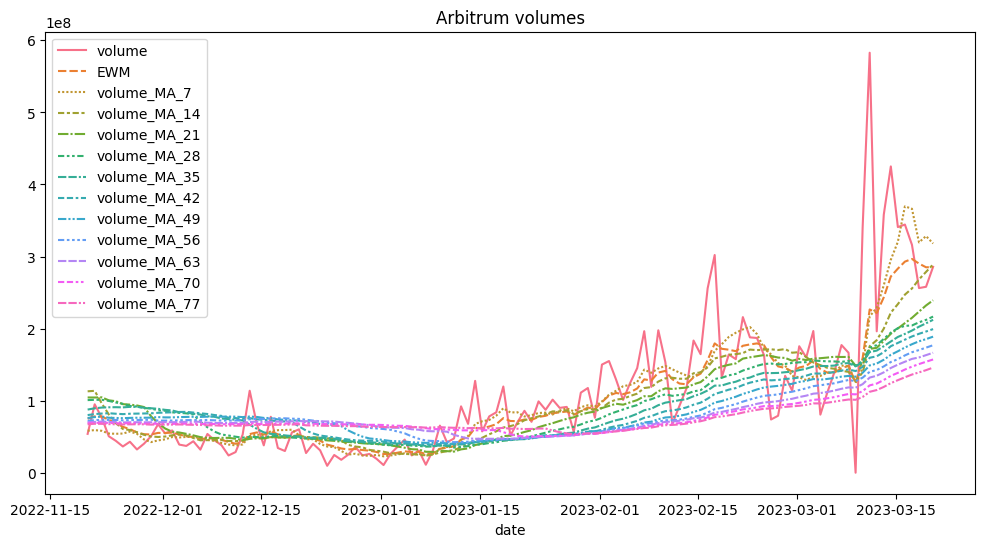

In [109]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Arbitrum volumes")
sns.lineplot(data=vol_arb_df.iloc[-120:])

<AxesSubplot: title={'center': 'Eth volumes'}, xlabel='date'>

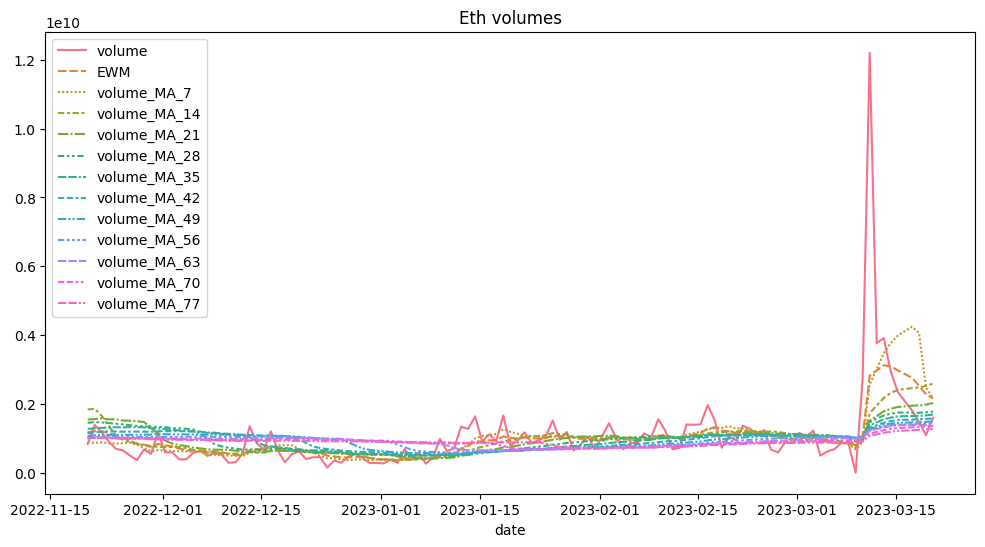

In [110]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Eth volumes")
sns.lineplot(data=vol_eth_df.iloc[-120:])

The graph shows that there's been long term momentum towards slightly increasing daily volume for uniswap v3. 


In [111]:
# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

2023-03-22 03:18:29.964868: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 03:18:30.112490: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-22 03:18:30.616156: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-22 03:18:30.616196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

In [122]:
vol_eth_df_c = vol_eth_df[[vol_col]]

In [123]:
scaler=MinMaxScaler(feature_range=(0,1))
vol_eth_df_c=scaler.fit_transform(np.array(vol_eth_df_c).reshape(-1,1))

In [124]:
# we keep the training set as 60%, 30% for validation and 10% testing set

training_size=int(len(vol_eth_df_c)*0.60)
validation_size = int(len(vol_eth_df_c)*0.30)
test_size=len(vol_eth_df_c)-training_size -  validation_size
train_data=vol_eth_df_c[0:training_size,:]
validation_data = vol_eth_df_c[training_size:training_size + validation_size,:1]
test_data = vol_eth_df_c[training_size + validation_size:len(vol_eth_df_c),:1]
print("train_data: ", train_data.shape)
print("validation_data: ", validation_data.shape)
print("test_data: ", test_data.shape)

train_data:  (410, 1)
validation_data:  (205, 1)
test_data:  (69, 1)


In [125]:


# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)



In [126]:


time_step = 12 * 2#12#15
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(validation_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)



X_train:  (385, 24)
y_train:  (385,)
X_val:  (180, 24)
y_val:  (180,)
X_test:  (44, 24)
y_test (44,)


In [127]:
model=Sequential()

unit_cnt = 20
# 10, 15, 20
model.add(LSTM(unit_cnt,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [128]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=int(unit_cnt * 4),batch_size=32,verbose=1)

Epoch 1/80
13/13 [==============================] - 1s 13ms/step - loss: 0.0126 - val_loss: 0.0031
Epoch 2/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 3/80
13/13 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0049
Epoch 4/80
13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 5/80
13/13 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 6/80
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0044
Epoch 7/80
13/13 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 8/80
13/13 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 9/80
13/13 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 10/80
13/13 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 11/80
13/13

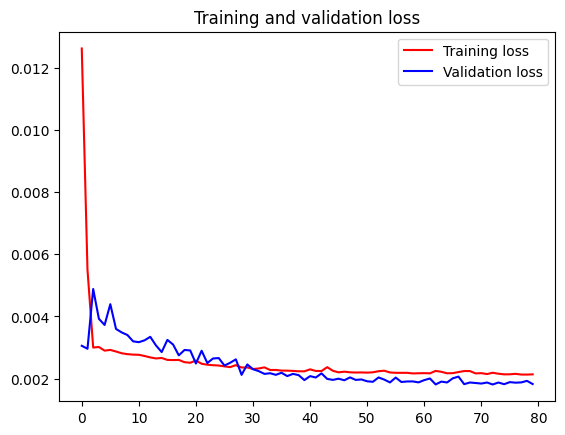

<Figure size 640x480 with 0 Axes>

In [129]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [130]:


### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
val_predict=model.predict(X_val)
test_predict=model.predict(X_test)
train_predict.shape, val_predict.shape, test_predict.shape



2/2 [==============================] - 0s 1ms/step


((385, 1), (180, 1), (44, 1))

In [131]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 


In [132]:


# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))



Train data RMSE:  561905109.3311979
Train data MSE:  3.157373518925054e+17
Train data MAE:  388158278.74350166
-------------------------------------------------------------------------------------
Test data RMSE:  1739820481.57278
Test data MSE:  3.02697530810014e+18
Test data MAE:  643322550.1473649


In [143]:
vol_eth_df_c = vol_eth_df[[vol_col]]

In [145]:


# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(vol_eth_df_c)
trainPredictPlot[:, :] = np.nan
start = look_back
end = len(train_predict)+look_back
print(f"start: {start}")
print(f"end: {end}")
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift validation predictions for plotting
valPredictPlot = np.empty_like(vol_eth_df_c)
valPredictPlot[:, :] = np.nan
start = len(train_predict)+(look_back * 2) + 1
end = len(val_predict) + start
# start += 1
print(f"start: {start}")
print(f"end: {end}")
valPredictPlot[start:end, :] = val_predict
print("Val predicted data: ", valPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(vol_eth_df_c)
testPredictPlot[:, :] = np.nan
start = len(train_predict) + len(val_predict) + (look_back*3) + 2
end = len(test_predict) + start
print(f"start: {start}")
print(f"end: {end}")
testPredictPlot[start:len(vol_eth_df_c)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

og_col = 'original_vol'
train_col = 'train_predicted_vol'
valid_col = 'valid_predicted_vol'
test_col = 'test_predicted_vol'
names = cycle([
    f'Original {vol_col}',
    f'Train predicted {vol_col}',
    f'Valid predicted {vol_col}',
    f'Test predicted {vol_col}'
])


plotdf = pd.DataFrame({'date': vol_eth_df_c.index,
                       og_col: vol_eth_df_c[vol_col],
                      train_col: trainPredictPlot.reshape(1,-1)[0].tolist(),
                      valid_col: valPredictPlot.reshape(1,-1)[0].tolist(),
                      test_col: testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf[og_col],plotdf[train_col],
                                          plotdf[valid_col],
                                          plotdf[test_col]],
              labels={'value':'Uniswap eth vol','date': 'Date'})
fig.update_layout(title_text=f'Comparision between original {vol_col} vs predicted {vol_col}',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text=vol_col)
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



start: 24
end: 409
Train predicted data:  (684, 1)
start: 434
end: 614
Val predicted data:  (684, 1)
start: 639
end: 683
Test predicted data:  (684, 1)


### Seems pretty accurate, can roughly predict the next few day's volume

<AxesSubplot: >

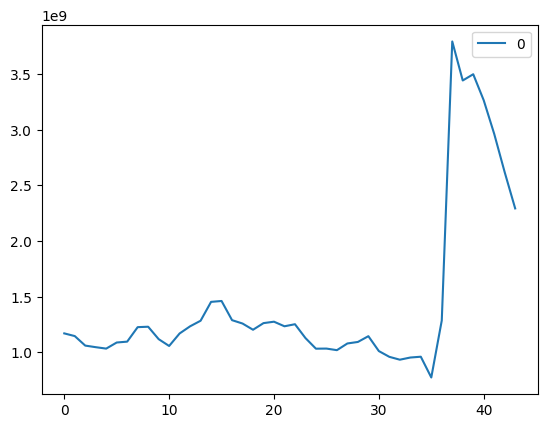

In [136]:
sns.lineplot(data=test_predict)

In [ ]:
# res_vol_eth = pd.concat()